In [1]:
import os
import random
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# Set seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Constants
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 25
DATASET_DIR = 'plantvillage_dataset/color'

In [4]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [5]:

train_generator = data_gen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 43456 images belonging to 38 classes.


In [6]:
validation_generator = data_gen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 10849 images belonging to 38 classes.


In [7]:
def build_cnn_model(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=38):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_cnn_model(num_classes=train_generator.num_classes)
model.summary()


d:\Workspace\Plant-Disease-Prediction-using-CNN-Model\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,254,438 (84.89 MB)

 Trainable params: 22,254,438 (84.89 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.3991 - loss: 2.2283

d:\Workspace\Plant-Disease-Prediction-using-CNN-Model\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 950s 699ms/step - accuracy: 0.3992 - loss: 2.2280 - val_accuracy: 0.6748 - val_loss: 1.0806
Epoch 2/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 856ms/step - accuracy: 0.6629 - loss: 1.1375

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1360s 1s/step - accuracy: 0.6629 - loss: 1.1374 - val_accuracy: 0.7988 - val_loss: 0.6258
Epoch 3/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.7329 - loss: 0.8642

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1170s 862ms/step - accuracy: 0.7329 - loss: 0.8642 - val_accuracy: 0.8142 - val_loss: 0.5925
Epoch 4/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 730ms/step - accuracy: 0.7773 - loss: 0.7149

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1150s 847ms/step - accuracy: 0.7773 - loss: 0.7149 - val_accuracy: 0.8638 - val_loss: 0.4281
Epoch 5/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.8041 - loss: 0.6383

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 940s 692ms/step - accuracy: 0.8041 - loss: 0.6383 - val_accuracy: 0.8850 - val_loss: 0.3627
Epoch 6/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.8193 - loss: 0.5684

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 882s 650ms/step - accuracy: 0.8193 - loss: 0.5683 - val_accuracy: 0.8862 - val_loss: 0.3564
Epoch 7/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.8352 - loss: 0.5275

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 886s 652ms/step - accuracy: 0.8352 - loss: 0.5275 - val_accuracy: 0.9012 - val_loss: 0.3079
Epoch 8/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 889s 655ms/step - accuracy: 0.8449 - loss: 0.4945 - val_accuracy: 0.8950 - val_loss: 0.3285
Epoch 9/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 874s 643ms/step - accuracy: 0.8570 - loss: 0.4552 - val_accuracy: 0.9031 - val_loss: 0.3283
Epoch 10/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.8620 - loss: 0.4481

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 877s 646ms/step - accuracy: 0.8620 - loss: 0.4481 - val_accuracy: 0.9172 - val_loss: 0.2534
Epoch 11/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.8743 - loss: 0.3933

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 881s 649ms/step - accuracy: 0.8743 - loss: 0.3933 - val_accuracy: 0.9253 - val_loss: 0.2388
Epoch 12/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.8766 - loss: 0.3981

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 876s 645ms/step - accuracy: 0.8766 - loss: 0.3980 - val_accuracy: 0.9241 - val_loss: 0.2361
Epoch 13/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 0.8819 - loss: 0.3801

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 880s 648ms/step - accuracy: 0.8819 - loss: 0.3801 - val_accuracy: 0.9315 - val_loss: 0.2184
Epoch 14/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.8916 - loss: 0.3475

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 879s 647ms/step - accuracy: 0.8916 - loss: 0.3475 - val_accuracy: 0.9448 - val_loss: 0.1755
Epoch 15/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 875s 644ms/step - accuracy: 0.8908 - loss: 0.3477 - val_accuracy: 0.9378 - val_loss: 0.1937
Epoch 16/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 873s 643ms/step - accuracy: 0.8970 - loss: 0.3326 - val_accuracy: 0.9147 - val_loss: 0.2667
Epoch 17/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 872s 642ms/step - accuracy: 0.8965 - loss: 0.3335 - val_accuracy: 0.9436 - val_loss: 0.1802
Epoch 18/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 871s 642ms/step - accuracy: 0.8984 - loss: 0.3349 - val_accuracy: 0.9453 - val_loss: 0.1772
Epoch 19/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.9035 - loss: 0.3138

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 979s 721ms/step - accuracy: 0.9035 - loss: 0.3138 - val_accuracy: 0.9469 - val_loss: 0.1641
Epoch 20/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.9013 - loss: 0.3174

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 889s 654ms/step - accuracy: 0.9013 - loss: 0.3174 - val_accuracy: 0.9508 - val_loss: 0.1479
Epoch 21/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 872s 642ms/step - accuracy: 0.9077 - loss: 0.2927 - val_accuracy: 0.9298 - val_loss: 0.2184
Epoch 22/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 872s 642ms/step - accuracy: 0.9067 - loss: 0.3005 - val_accuracy: 0.9484 - val_loss: 0.1665
Epoch 23/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 871s 641ms/step - accuracy: 0.9153 - loss: 0.2641 - val_accuracy: 0.9481 - val_loss: 0.1632
Epoch 24/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.9089 - loss: 0.2959

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 875s 644ms/step - accuracy: 0.9089 - loss: 0.2959 - val_accuracy: 0.9549 - val_loss: 0.1431
Epoch 25/25
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 874s 644ms/step - accuracy: 0.9150 - loss: 0.2745 - val_accuracy: 0.9535 - val_loss: 0.1476


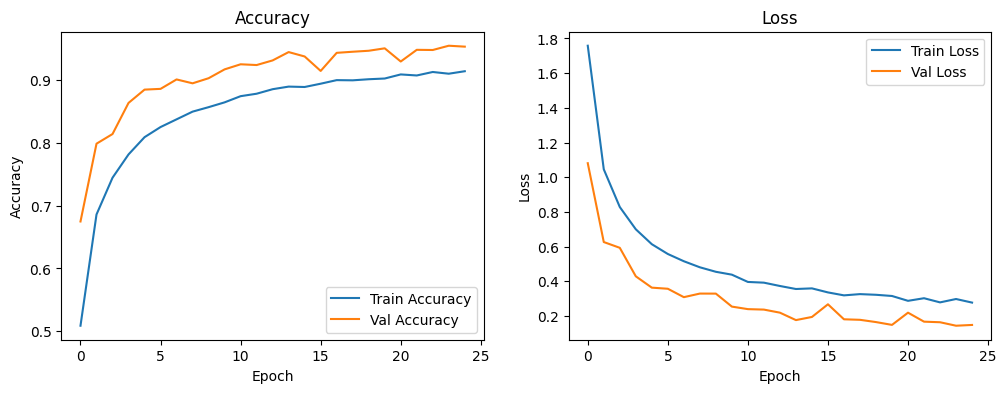

In [11]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)



In [12]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

340/340 ━━━━━━━━━━━━━━━━━━━━ 95s 278ms/step - accuracy: 0.9573 - loss: 0.1385
Validation Accuracy: 95.52%


In [13]:
# Save class indices
class_indices = {v: k for k, v in train_generator.class_indices.items()}
json.dump(class_indices, open('class_indices.json', 'w'))

def load_and_preprocess_image(image_path):
    img = Image.open(image_path).resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

def predict_image_class(model, image_path, class_indices):
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction, axis=1)[0]
    return class_indices[predicted_index]


In [15]:
test_image_path = 'D:/Workspace/Plant-Disease-Prediction-using-CNN-Model/test_images/test_apple_black_rot.JPG'
predicted_class = predict_image_class(model, test_image_path, class_indices)
print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted Class: Apple___Black_rot


In [16]:
model.save('plant_disease_prediction_model_v2.h5')